In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
# compile column names into a list
column_lst= df.columns
column_lst

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
# 1st Q: Are bookings with longer lead time (days between date of reservation and date of arrival) more likely to be cancelled?
# Using the data, this question can be answered, revealing insights the business could act based on

#To answer the question, compute the proportion of cancellations to total bookings for each lead time value (min:0 max:737 days)
#Plot a graph with lead_time in the x axis and the proprtion of cancellations in the y axis


In [4]:
# create dataframe with only is_canceled and lead_time columns 
can_df= df[['is_canceled', 'lead_time']]

def eval_prop(df):
    
    t_vals= df['lead_time']
    array= []
    done=[]
    for t in t_vals:
        if t in done:
            continue
            
        df_new= df[df['lead_time']==t] #select rows with this many days of lead time
        
        prop= df_new[df_new['is_canceled']==1].shape[0]/df_new.shape[0]
        array.append((t,prop))
        done.append(t)
    return array

In [5]:
xy=eval_prop(can_df)

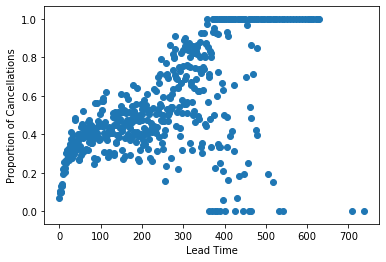

In [6]:
# Dots represent each lead time value [0, 737]
plt.xlabel('Lead Time')
plt.ylabel('Proportion of Cancellations')
plt.scatter(*zip(*xy))
plt.show()

In [7]:
# graph shows an increase in proportion but looks a bit messy. let's see if we can improve it

def eval_prop_v2(df, cutoff=0):
    
    t_vals= df['lead_time']
    array= []
    done=[]
    for t in t_vals:
        if t in done:
            continue
        done.append(t)
        
        df_new= df[df['lead_time']==t] #select rows with this many days of lead time
        if df_new.shape[0]<cutoff: # drop vals with less than 10 rows to extract meaningful stats
            continue
        
        prop= df_new[df_new['is_canceled']==1].shape[0]/df_new.shape[0]
        array.append((t,prop))
        
    return array

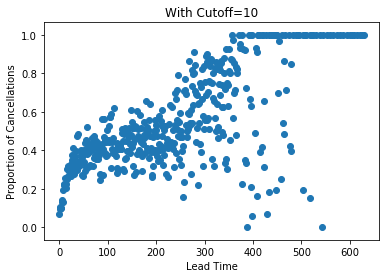

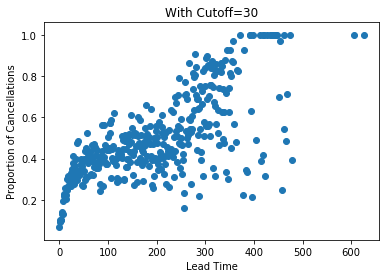

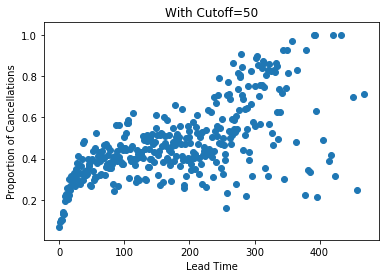

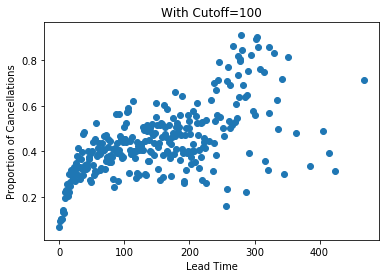

In [8]:
# Create a cutoff to observe points with bookings larger or equal than cutoff
cutoffs= [10, 30, 50, 100]
for cutoff in cutoffs:
    xy=eval_prop_v2(can_df, cutoff=cutoff)
    plt.xlabel('Lead Time')
    plt.ylabel('Proportion of Cancellations')
    plt.title('With Cutoff={}'.format(cutoff))
    plt.scatter(*zip(*xy))
    plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


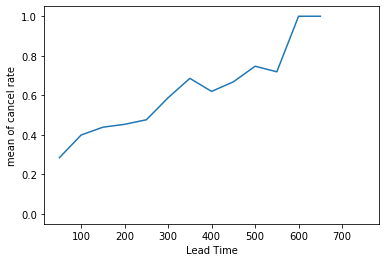

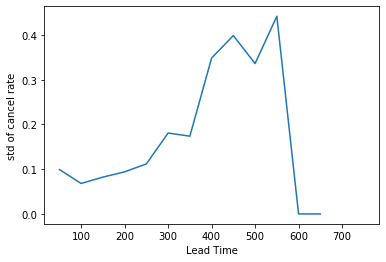

In [9]:
# From the graph, it seems the pattern of the plot remains approximitely the same with different cutoffs
# bookings will be divided to 15 segments based on lead time. segment 1: bookings that had 50 days lead time or less
# segment 2: bookings that had 100 days lead time or less but no less than 50 and so forth
xy=eval_prop(can_df)
df_xy=pd.DataFrame(xy, columns=['lead_time', 'cancel_rate'])

segments=[(i, i+50) for i in range(0, 701, 50)]
xax=[i for i in range(50, 751, 50)]
means=[]
stds=[]
for small, large in segments:

    means.append(df_xy[df_xy['lead_time']<=large][df_xy['lead_time']>=small].mean()[1])
    stds.append(df_xy[df_xy['lead_time']<=large][df_xy['lead_time']>=small].std()[1])

plt.xlabel('Lead Time')
plt.ylabel('mean of cancel rate')    
plt.plot(xax,means)
plt.show()

plt.xlabel('Lead Time')
plt.ylabel('std of cancel rate')
plt.plot(xax,stds)
plt.show()

In [11]:
'''As the graph demostrates above, lower lead times have, on average, a lesser chance of being canceled.
As lead time grows, customer becomes more complex and less predictable, as shown by the higher standard deviation.
This means that a considerable portion of bookings with longer lead time have good chance of not being canceled.
However, on average, these booking are more likely to be canceled'''

'As the graph demostrates above, lower lead times have, on average, a lesser chance of being canceled.\nAs lead time grows, customer becomes more complex and less predictable, as shown by the higher standard deviation.\nThis means that a considerable portion of bookings with longer lead time have good chance of not being canceled.\nHowever, on average, these booking are more likely to be canceled'